<h2>Churn de Clientes - Bank Dataset</h2>

In [1]:
## ----------------------------------------------------------------
#* Link do dataset
    #  https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

#* Descrição das variáveis
    #* RowNumber
    #Número da linha do dataset
    #* CustomerId
    #Número randômico e único que identifica o cliente
    #* Surname
    #Sobrenome do cliente
    #* CreditScore
    #Pontuação de crédito atribuida ao cliente
    #* Geography
    #Localização do cliente
    #* Gender
    #Gênero do cliente
    #* Age
    #Idade do cliente
    #* Tenure
    #Fidelidade do cliente | Quantidade de anos que o cliente está na instituição
    #* Balance
    #Saldo do cliente
    #* NumOfProducts
    #Quantidade de produtos que o cliente comprou no banco
    #* HasCrCard
    #Se o cliente possui ou não cartão de crédito sendo 1|Sim e 0|Não
    #* IsActiveMember
    #  - Se o cliente é ativo ou não no banco
    #* EstimatedSalary
    #  - Renda do cliente
    #*Exited
    #  - Se o cliente deixou ou não a instituição sendo 1|Sim e 0|Não  
## ----------------------------------------------------------------

<h5>1. Importação dos pacotes </h5>

In [2]:
## ----------------------------------------------------------------
#* Manipulação de dados
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st
#* DataViz
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import ydata_profiling
from ydata_profiling import ProfileReport
#! Pacotes não utilizados no momento
#import plotly.express as px
#import plotly.io as pio
#import chart_studio.plotly as py
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#* Machine Learning
## ----------------------------------------------------------------

<h5>2. Leitura e tratamento do dataset </h5>

In [3]:
df_original = pd.read_csv(filepath_or_buffer = 'churn.csv', header = 0)
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Excluir colunas que não serão utilizadas
trash_colunas = {'RowNumber', 'CustomerId', 'Surname'}
#
df = df_original.drop(columns = trash_colunas)
del(trash_colunas)
del(df_original)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Criar lista com nome das novas variáveis
novas_colunas = {
    'CustomerId': 'Id',
    'CreditScore': 'Score',
    'Geography': 'Pais',
    'Gender': 'Genero',
    'Age': 'Idade',
    'Tenure': 'Fidelidade',
    'Balance': 'Saldo',
    'NumOfProducts': 'QtdProdutos',
    'HasCrCard': 'TemCartao',
    'IsActiveMember': 'ClienteAtivo',
    'EstimatedSalary': 'Renda',
    'Exited': 'Churn'
    }
#renomeando as variáveis
df.rename(columns = novas_colunas, inplace = True)
#
del(novas_colunas)
#
df.head()

,Score,Pais,Genero,Idade,Fidelidade,Saldo,QtdProdutos,TemCartao,ClienteAtivo,Renda,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h4>3. Análise Exploratória </h4>

In [6]:
# #Criação de perfil para geração de relatório Profiling
# profile = ProfileReport(df, title = 'Bank Churn')
# #Funções para utilização do pacote ydata_profiling em Jupyter
# profile.to_widgets()
# profile.to_notebook_iframe()

In [7]:
# #Salvando o relatório em html
# profile.to_file('churn_Profile.html')

In [8]:
#Informações sobre missing values e tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Score         10000 non-null  int64  
 1   Pais          10000 non-null  object 
 2   Genero        10000 non-null  object 
 3   Idade         10000 non-null  int64  
 4   Fidelidade    10000 non-null  int64  
 5   Saldo         10000 non-null  float64
 6   QtdProdutos   10000 non-null  int64  
 7   TemCartao     10000 non-null  int64  
 8   ClienteAtivo  10000 non-null  int64  
 9   Renda         10000 non-null  float64
 10  Churn         10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
#Lista variáveis numéricas
df_numericas = df.select_dtypes('number').columns 
#Lista variáveis categóricas
df_categoricas = df.select_dtypes('object').columns 

print('Variáveis numéricas:', df_numericas)
print('Variáveis categóricas:', df_categoricas)

Variáveis numéricas: Index(['Score', 'Idade', 'Fidelidade', 'Saldo', 'QtdProdutos', 'TemCartao',
       'ClienteAtivo', 'Renda', 'Churn'],
      dtype='object')
Variáveis categóricas: Index(['Pais', 'Genero'], dtype='object')


In [10]:
#Estatísticas descritivas das variáveis numéricas
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
Score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Idade,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Fidelidade,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Saldo,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
QtdProdutos,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
TemCartao,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
ClienteAtivo,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Renda,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
#Estatísticas descritivas das variáveis categóricas
df.select_dtypes('object').describe().T

,count,unique,top,freq
Pais,10000,3,France,5014
Genero,10000,2,Male,5457


In [12]:
#Alterando o conteúdo das variáveis categóricas
#* Localização
df['Pais'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Pais, dtype: int64

In [13]:
#Alterando os valores da variável #Localização
df['Pais'].replace({
    'France' : 'França',
    'Germany' : 'Alemanha',
    'Spain' : 'Espanha'
}, inplace = True)
#
df['Pais'].unique()

array(['França', 'Espanha', 'Alemanha'], dtype=object)

In [14]:
#Alterando o conteúdo das variáveis categóricas
#* Gênero
df['Genero'].value_counts()

Male      5457
Female    4543
Name: Genero, dtype: int64

In [15]:
#Alterando os valores da variável #Localização
#* Gênero
df['Genero'].replace({
    'Male' : 'Masculino',
    'Female' : 'Feminino'
}, inplace = True)
#
df['Genero'].unique()

array(['Feminino', 'Masculino'], dtype=object)

<h5>3.1. Análise univariada</h5>

In [16]:
#IQR - https://www.statisticshowto.com/probability-and-statistics/interquartile-range/
#Lower and Upper Fence - https://www.statisticshowto.com/upper-and-lower-fences/

In [148]:
# Definição do Tema do Seaborn
sns.set_theme(
    context = 'paper', style = 'whitegrid', palette = 'muted',
    font = 'sans-serif', font_scale = 1, color_codes = True, 
    rc = None
)

3.1.1. Score de Crédito

<AxesSubplot: xlabel='Score'>

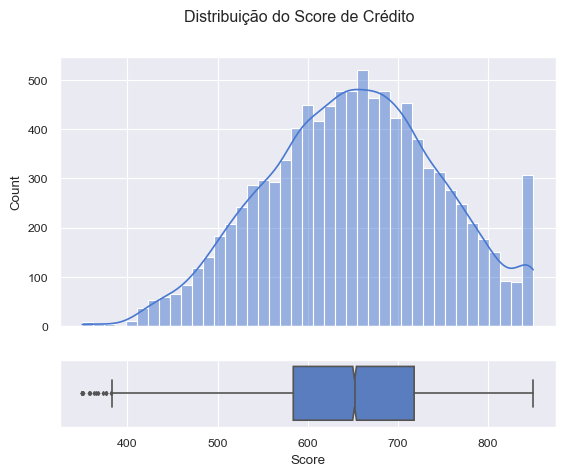

In [123]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição do Score de Crédito')
#Gráfico 1 - Histograma
sns.histplot(x = df['Score'], kde = True, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df['Score'], fliersize = 2, notch = True, ax = axs[1])

3.1.2. Idade

<AxesSubplot: xlabel='Idade'>

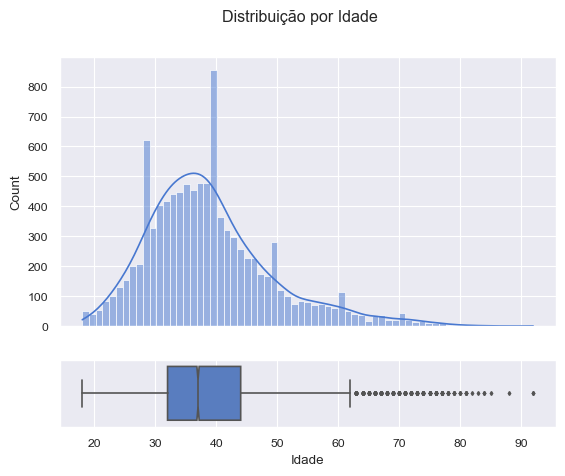

In [124]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição por Idade')
#Gráfico 1 - Histograma
sns.histplot(x = df['Idade'], kde = True, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df['Idade'], fliersize = 2, notch = True, ax = axs[1])

3.1.3. Tempo de fidelidade

<AxesSubplot: xlabel='Fidelidade'>

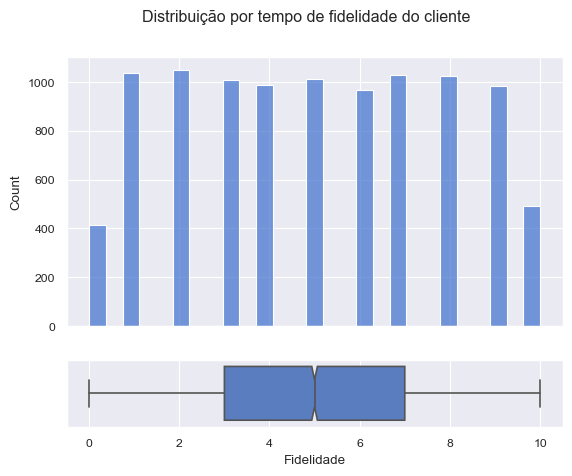

In [125]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição por tempo de fidelidade do cliente')
#Gráfico 1 - Histograma
sns.histplot(x = df['Fidelidade'], kde = False, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df['Fidelidade'], fliersize = 2, notch = True, ax = axs[1])

3.1.4. Saldo

<AxesSubplot: xlabel='Saldo'>

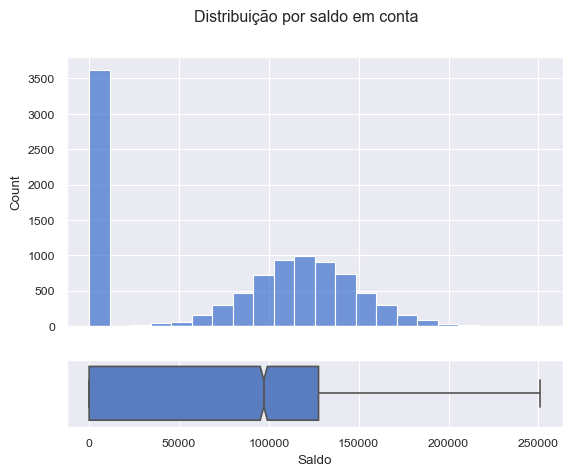

In [126]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição por saldo em conta')
#Gráfico 1 - Histograma
sns.histplot(x = df['Saldo'], kde = False, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df['Saldo'], fliersize = 2, notch = True, ax = axs[1])

3.1.5. Quantidade de produtos

<AxesSubplot: xlabel='QtdProdutos'>

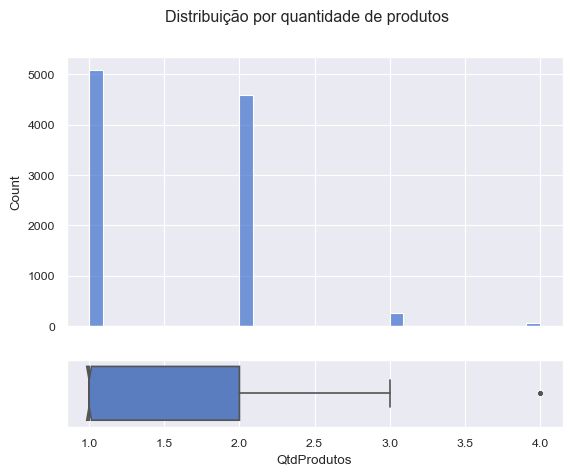

In [127]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição por quantidade de produtos')
#Gráfico 1 - Histograma
sns.histplot(x = df['QtdProdutos'], kde = False, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df['QtdProdutos'], fliersize = 2, notch = True, ax = axs[1])

3.1.6. Salário Estimado

<AxesSubplot: xlabel='Renda'>

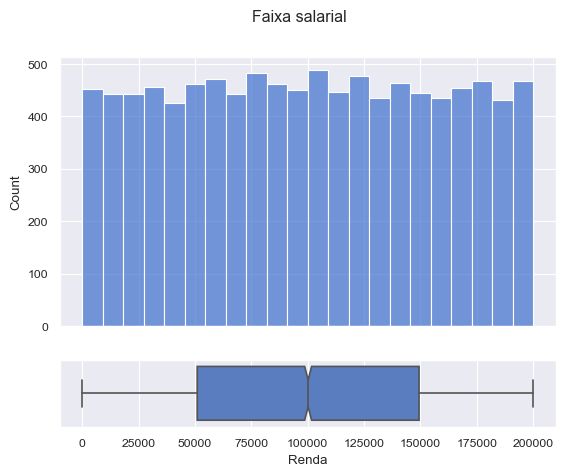

In [128]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Faixa salarial')
#Gráfico 1 - Histograma
sns.histplot(x = df['Renda'], kde = False, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df['Renda'], fliersize = 2, notch = True, ax = axs[1])

3.1.7. Cartão de Crédito

[Text(0, 0, '2945'), Text(0, 0, '7055')]

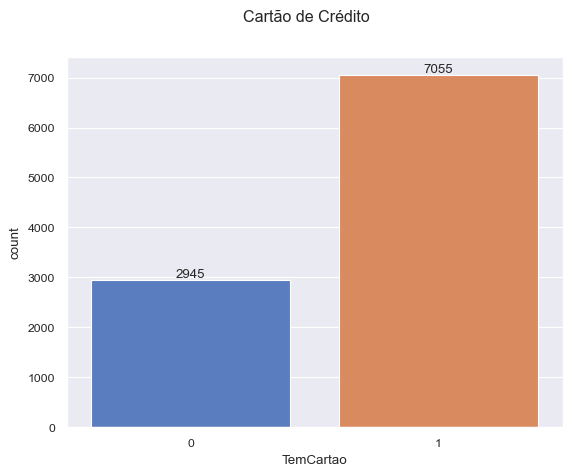

In [129]:
#Título da imagem
plt.suptitle('Cartão de Crédito')
ax = sns.countplot(data = df, x = df['TemCartao'])
#Inclusão dos rótulos
ax.bar_label(ax.containers[0])

3.1.8. Clientes ativos e inativos

[Text(0, 0, '4849'), Text(0, 0, '5151')]

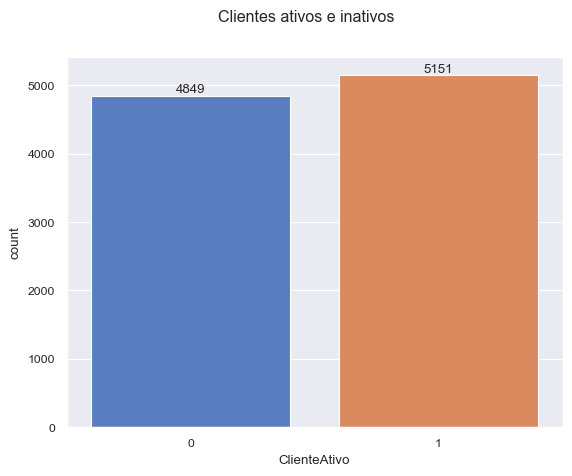

In [130]:
#Título da imagem
plt.suptitle('Clientes ativos e inativos')
ax = sns.countplot(data = df, x = df['ClienteAtivo'])
#Inclusão dos rótulos
ax.bar_label(ax.containers[0])

3.1.9. Churn

[Text(0, 0, '7963'), Text(0, 0, '2037')]

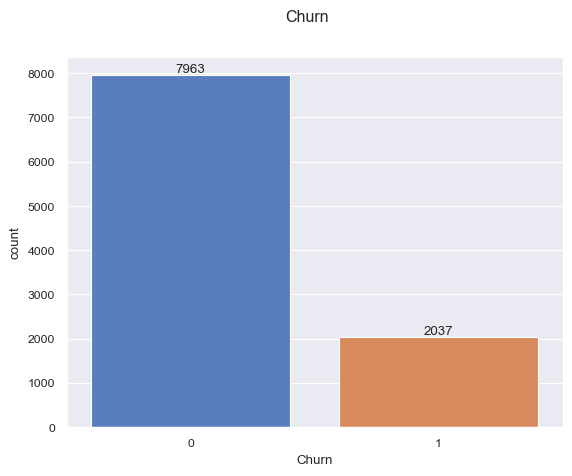

In [131]:
#Título da imagem
plt.suptitle('Churn')
ax = sns.countplot(data = df, x = df['Churn'])
#Inclusão dos rótulos
ax.bar_label(ax.containers[0])

3.1.10. País de residência

[Text(0, 0, '5014'), Text(0, 0, '2477'), Text(0, 0, '2509')]

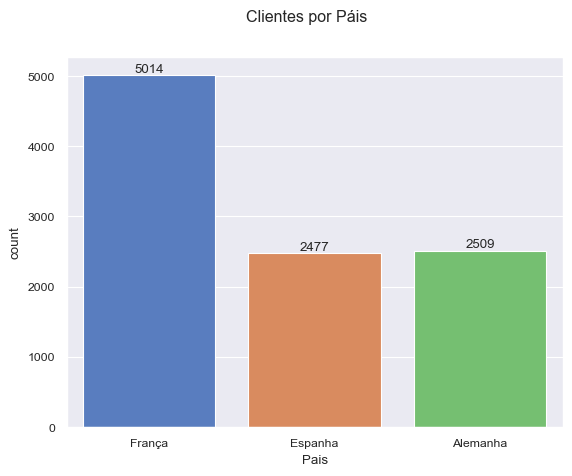

In [132]:
#Título da imagem
plt.suptitle('Clientes por Páis')
ax = sns.countplot(data = df, x = df['Pais'])
#Inclusão dos rótulos
ax.bar_label(ax.containers[0])

3.1.11. Gênero

[Text(0, 0, '4543'), Text(0, 0, '5457')]

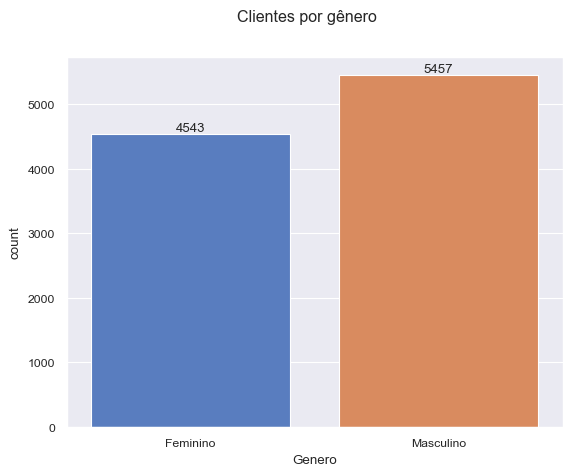

In [133]:
#Título da imagem
plt.suptitle('Clientes por gênero')
ax = sns.countplot(data = df, x = df['Genero'])
#Inclusão dos rótulos
ax.bar_label(ax.containers[0])

<h5>3.2. Análise bivariada</h5>

In [134]:
corr = df.corr()

C:\Users\Willy\AppData\Local\Temp\ipykernel_30320\658818363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


In [135]:
corr

,Score,Idade,Fidelidade,Saldo,QtdProdutos,TemCartao,ClienteAtivo,Renda,Churn
Score,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Idade,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Fidelidade,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Saldo,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
QtdProdutos,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
TemCartao,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
ClienteAtivo,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Renda,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Churn,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [192]:
paleta_div = sns.diverging_palette(h_neg = 250, h_pos = 20, s=75, l=50, sep=1, n=6, center='light', as_cmap=False)
paleta_div

[(0.26613466399181535, 0.47369810827813025, 0.7317615976606106),
 (0.5370642947070804, 0.6624089282430076, 0.8193382948975503),
 (0.8106397225972991, 0.8529626273091042, 0.9077702333184445),
 (0.9140860646530862, 0.8246826885128927, 0.8028133239419792),
 (0.8384144678873866, 0.5785740917778832, 0.5129511551488873),
 (0.7634747047461135, 0.3348456555528834, 0.225892295531744)]

<AxesSubplot: >

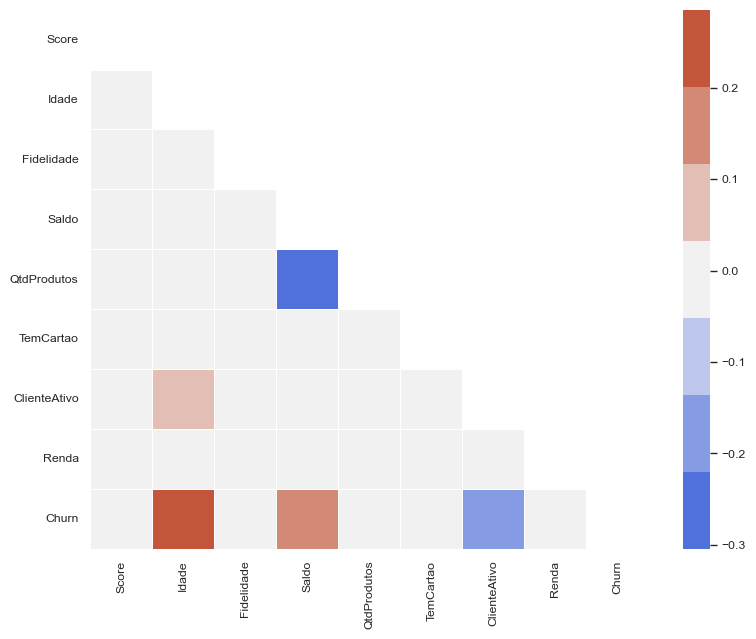

In [205]:
f, ax = plt.subplots(figsize = (9, 7))
sns.heatmap(corr, mask = mask, cmap = cmap, linewidths= 0.4, cbar=True)

3.2.1. Score x Idade

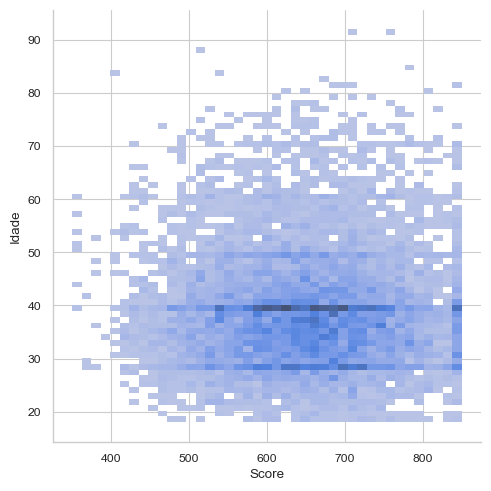

In [206]:
sns.displot(df, x = df['Score'], y = df['Idade'])

3.2.2. Score x Fidelidade

In [ ]:
sns.displot(df, x = df['Score'], y = df['Fidelidade'])

3.2.3. Score x Saldo

In [ ]:
sns.displot(df, x = df['Score'], y = df['Saldo'])

3.2.4. Score x Qtd de Produtos

In [ ]:
sns.displot(df, x = df['Score'], y = df['QtdProdutos'])

3.2.5. Score x 

3.2.1. Score de Crédito x Tem Cartão

In [ ]:
#Título da imagem
plt.suptitle('Score de Crédito x Tem cartão')
sns.boxplot(data = df, x = df['TemCartao'], y = df['Score'], fliersize = 2, notch = True)

3.2.2. Score de Crédito x Cliente Ativo

In [ ]:
#Título da imagem
plt.suptitle('Score de Crédito x Cliente ativo')
sns.boxplot(data = df, x = df['ClienteAtivo'], y = df['Score'], fliersize = 2, notch = True)

3.2.3. Idade x Tem Cartão

In [ ]:
#Título da imagem
plt.suptitle('Idade x Tem cartão')
sns.boxplot(data = df, x = df['TemCartao'], y = df['Idade'], fliersize = 2, notch = True)

3.2.4. 

_________________

In [ ]:
#Definição do estilo dos gráficos
#plt.style.use('seaborn-v0_8')
#pio.templates

In [ ]:
#Definição do template dos gráficos
#pio.templates.default = 'seaborn'

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.Score), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.Score, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Score de Crédito', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [300, 900])

#Mostrar o gráfico
fig.show()

In [ ]:
df.Idade.describe()

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.Idade), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.Idade, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Idade', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [0, 100])

#Mostrar o gráfico
fig.show()

In [ ]:
df.Fidelidade.describe()

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.Fidelidade), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.Fidelidade, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Tempo de fidelidade (em anos)', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [-5, 15])

#Mostrar o gráfico
fig.show()

In [ ]:
df.Saldo.describe()

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.Saldo), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.Saldo, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Saldo', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [-10000, 300000])

#Mostrar o gráfico
fig.show()

In [ ]:
df_numericas

In [ ]:
df.QtdProdutos.describe()

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.QtdProdutos), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.QtdProdutos, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Quantidade de Produtos', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [0, 5])

#Mostrar o gráfico
fig.show()

In [ ]:
#Definições dos quartis, mediana e limites e contabilização de outliers
q1_Score = np.nanpercentile(df.Score, 25)
q3_Score = np.nanpercentile(df.Score, 75)
media_Score = np.mean(df.Score)
iqr_Score = q3_Score - q1_Score
lower_f_Score = q1_Score - (1.5 * iqr_Score)
upper_f_Score = q3_Score + (1.5 * iqr_Score)

#Quantidade de outliers
Score_outlier = []
for num in df.Score:
    if num < lower_f_Score:
        Score_outlier.append(num)
    if num > upper_f_Score:
        Score_outlier.append(num)

#Quantidade de não outliers
Score_non_outlier = []
for num in df.Score:
    if num >= lower_f_Score:
        Score_non_outlier.append(num)
    if num <= upper_f_Score:
        Score_non_outlier.append(num)

In [ ]:
print('---Score de Crédito---')
print('Q1:', q1_Score)
print('Q3:', q3_Score)
print('Intervalo Interquartil (IQR):', iqr_Score)
print('Média:', media_Score)
print('Lower Fence:', lower_f_Score)
print('Upper Fence:', upper_f_Score)
print('Soma de valores únicos:', len(Score_outlier))
print('Menor valor:', np.min(Score_non_outlier))
print('Maior valor:', np.max(Score_non_outlier))
print('Outliers:', len(Score_outlier))
print('Não outliers:', len(Score_non_outlier))

In [ ]:
#Criando figura para inserção de dois gráficos
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5,1]}, sharex=True)
#Histograma
sns.histplot(x = df.Score, kde=True, ax=ax[0])
ax[0].axvline(x = q1_Score, linestyle='-', linewidth=1.5, color='black')
ax[0].axvline(x = q3_Score, linestyle='-', linewidth=1.5, color='black')
ax[0].axvline(x = np.nanpercentile(df.Score, 50), linestyle='-', linewidth=1.5, color='black')
ax[0].axvline(x = np.mean(df.Score), linestyle=':', linewidth=2, color='red')
#Boxplot
sns.boxplot(x = df.Score, ax=ax[1])

In [ ]:
def outlier(x):
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    outlier = []
    for num in x:
        if num < lower_fence:
            outlier.append(num)
        if num > upper_fence:
            outlier.append(num)
            
    non_outlier = []
    for num in x:
        if num >= lower_fence:
            non_outlier.append(num)
        if num <= upper_fence:
            non_outlier.append(num)
    
    print(f'sum of unique value : {len(outlier)}' )
    print(f'lower_value: {np.min(non_outlier)}')
    print(f'upper_vaue: {np.max(non_outlier)}')

In [ ]:
norm_data = []
for y,x in enumerate(df_numericas,1):
    print(f'{y}. {x}')
    fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':[5,1]})
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    ax[0].axvline(np.nanpercentile(df[x], 25), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 50), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 75), c='red',linestyle='--')
    ax[0].axvline(np.mean(df[x]), c='blue',linestyle='--')
    
    sns.boxplot(data=df, x=x, ax=ax[1])
    ax[1].set_xlabel(f'{x}')
    plt.show()
    print(' ')
    df[x].describe()
    print(' ')
    outlier(df[x])
    print(' ')
    sk, pval = st.skewtest(df[x])
    if pval < 0.05:
        print(f'Data skewed with skew is {sk}')
    else:
        print(f'Data not skewed')
    print(' ')
    norm, pval = st.normaltest(df[x])
    if pval < 0.05:
        print(f'Data not normal')
    else:
        print(f'Data normal')
        norm_data.append(x)
    print('-'*50)
    print(' ')